In [2]:
# !pip install mediapipe

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import os
import warnings
import cv2
import mediapipe as mp

### 1. Dataframe.


1.1 *Read data.*

In [4]:
PreparedData_train= pd.read_csv('PreparedData_train.csv')
PreparedData_test= pd.read_csv('PreparedData_test.csv')

In [5]:
PreparedData_train
# PreparedData_test

,distance_1,distance_2,distance_3,distance_4,distance_5,distance_6,distance_7,distance_8,distance_9,distance_10,...,distance_163,distance_164,distance_165,distance_166,distance_167,distance_168,distance_169,distance_170,distance_171,labels
0,179.377991,185.657104,193.708572,194.314728,190.400345,191.084656,189.959229,184.768188,176.258118,175.925018,...,6.028207,133.490952,140.034943,8.305850,120.655739,125.972214,127.820213,134.221054,81.081841,0
1,178.502106,184.936905,192.894318,193.492264,189.583389,190.254028,189.183304,183.815475,175.244888,174.927109,...,6.204184,132.835907,140.177780,8.396239,119.925415,125.777115,127.070335,134.138565,80.406319,0
2,161.881317,169.552094,177.512833,177.179291,172.524597,172.721466,174.800095,165.745773,157.294540,157.382278,...,6.779693,113.278748,118.957329,7.817574,99.167038,105.230209,106.583466,112.736084,63.347572,0
3,147.752396,152.885284,159.517792,160.293549,156.785995,157.441803,156.453201,152.318588,145.961884,145.593735,...,4.898232,101.923943,108.365829,6.238461,91.900764,97.499886,97.304474,103.674599,64.054001,0
4,143.766617,148.776520,154.473633,154.733994,151.858353,151.946777,152.249527,146.971527,140.305191,140.418503,...,4.686013,99.061226,105.083054,6.561421,88.900284,94.213547,94.603539,100.670845,64.665779,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,193.933701,202.984283,214.129562,215.725388,208.223511,209.839722,209.605896,200.797775,189.987656,188.966751,...,8.996443,143.782120,154.730530,10.695856,126.107628,135.264481,135.461716,145.891846,83.180634,1
634,193.418930,202.317688,213.329605,214.812958,207.565414,209.142990,208.800415,200.287735,189.691223,188.664566,...,8.763120,143.848953,155.279648,10.427258,126.497025,136.374435,135.668625,146.718094,84.028801,1
635,193.809769,202.752792,213.728821,215.199081,207.998581,209.564651,209.216675,200.672668,189.907700,188.898163,...,8.791583,143.932922,155.327164,10.588622,126.359314,136.255814,135.706589,146.749664,84.057358,1
636,193.855530,202.801727,213.697784,215.125183,207.938354,209.450775,209.258591,200.540848,189.755554,188.794037,...,8.821323,143.936401,154.925247,10.611777,126.377327,135.783569,135.712646,146.305298,84.244087,1


1.2 *Check which rows are all 0.0 values except the 'labels' column.*

In [6]:
def is_row_all_zero_except_label(df):
    """
    Check if all columns in the DataFrame, except the 'labels' column, are equal to 0 for each row.

    Parameters:
    df (DataFrame): The input DataFrame.

    Returns:
    (Series): A boolean Series indicating True for rows where all columns, except 'labels', are 0, and False otherwise. Rows where 'labels' may contain non-zero values.
    """
    return (df.drop('labels', axis=1) == 0).all(axis=1)


1.3 *Show rows have all 0.0 values except the 'labels' column.*

In [7]:
# Check for null rows in PreparedData_train
null_rows_train = is_row_all_zero_except_label(PreparedData_train)
print("Null rows in PrepareddData_train:")
print(PreparedData_train[null_rows_train].to_string)

# Check for null rows in PreparedData_test)
null_rows_test = is_row_all_zero_except_label(PreparedData_test)
print("Null rows in PreparedData_test:")
print(PreparedData_test[null_rows_test].to_string)

Null rows in PrepareddData_train:
<bound method DataFrame.to_string of      distance_1  distance_2  distance_3  distance_4  distance_5  distance_6  \
10          0.0         0.0         0.0         0.0         0.0         0.0   
17          0.0         0.0         0.0         0.0         0.0         0.0   
27          0.0         0.0         0.0         0.0         0.0         0.0   
42          0.0         0.0         0.0         0.0         0.0         0.0   
52          0.0         0.0         0.0         0.0         0.0         0.0   
..          ...         ...         ...         ...         ...         ...   
488         0.0         0.0         0.0         0.0         0.0         0.0   
497         0.0         0.0         0.0         0.0         0.0         0.0   
526         0.0         0.0         0.0         0.0         0.0         0.0   
544         0.0         0.0         0.0         0.0         0.0         0.0   
565         0.0         0.0         0.0         0.0         

In [8]:
PreparedData_train.loc[null_rows_train]

,distance_1,distance_2,distance_3,distance_4,distance_5,distance_6,distance_7,distance_8,distance_9,distance_10,...,distance_163,distance_164,distance_165,distance_166,distance_167,distance_168,distance_169,distance_170,distance_171,labels
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


1.4 *Update Data when remove null values in rows.*

In [9]:
# Remove null rows from CombinedData_train and reset the index
PreparedData_train = PreparedData_train[~null_rows_train].reset_index(drop=True)

# Remove null rows from CombinedData_test and reset the index
PreparedData_test = PreparedData_test[~null_rows_test].reset_index(drop=True)

PreparedData_train


,distance_1,distance_2,distance_3,distance_4,distance_5,distance_6,distance_7,distance_8,distance_9,distance_10,...,distance_163,distance_164,distance_165,distance_166,distance_167,distance_168,distance_169,distance_170,distance_171,labels
0,179.377991,185.657104,193.708572,194.314728,190.400345,191.084656,189.959229,184.768188,176.258118,175.925018,...,6.028207,133.490952,140.034943,8.305850,120.655739,125.972214,127.820213,134.221054,81.081841,0
1,178.502106,184.936905,192.894318,193.492264,189.583389,190.254028,189.183304,183.815475,175.244888,174.927109,...,6.204184,132.835907,140.177780,8.396239,119.925415,125.777115,127.070335,134.138565,80.406319,0
2,161.881317,169.552094,177.512833,177.179291,172.524597,172.721466,174.800095,165.745773,157.294540,157.382278,...,6.779693,113.278748,118.957329,7.817574,99.167038,105.230209,106.583466,112.736084,63.347572,0
3,147.752396,152.885284,159.517792,160.293549,156.785995,157.441803,156.453201,152.318588,145.961884,145.593735,...,4.898232,101.923943,108.365829,6.238461,91.900764,97.499886,97.304474,103.674599,64.054001,0
4,143.766617,148.776520,154.473633,154.733994,151.858353,151.946777,152.249527,146.971527,140.305191,140.418503,...,4.686013,99.061226,105.083054,6.561421,88.900284,94.213547,94.603539,100.670845,64.665779,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,193.933701,202.984283,214.129562,215.725388,208.223511,209.839722,209.605896,200.797775,189.987656,188.966751,...,8.996443,143.782120,154.730530,10.695856,126.107628,135.264481,135.461716,145.891846,83.180634,1
559,193.418930,202.317688,213.329605,214.812958,207.565414,209.142990,208.800415,200.287735,189.691223,188.664566,...,8.763120,143.848953,155.279648,10.427258,126.497025,136.374435,135.668625,146.718094,84.028801,1
560,193.809769,202.752792,213.728821,215.199081,207.998581,209.564651,209.216675,200.672668,189.907700,188.898163,...,8.791583,143.932922,155.327164,10.588622,126.359314,136.255814,135.706589,146.749664,84.057358,1
561,193.855530,202.801727,213.697784,215.125183,207.938354,209.450775,209.258591,200.540848,189.755554,188.794037,...,8.821323,143.936401,154.925247,10.611777,126.377327,135.783569,135.712646,146.305298,84.244087,1


In [10]:
PreparedData_train.iloc[526]

distance_1      156.151077
distance_2      165.023331
distance_3      173.404678
distance_4      173.355576
distance_5      166.511810
                   ...    
distance_168    102.195450
distance_169    103.317375
distance_170    112.137367
distance_171     64.874657
labels            1.000000
Name: 526, Length: 172, dtype: float64

1.5 *Save file npz.*

In [11]:

# Define the custom directory where you want to save the .npz files
save_directory = ""


# Specify the file paths for the DataFrames
combined_data_train_path = os.path.join(save_directory, 'PreprocessedData_train.npz')
combined_data_test_path = os.path.join(save_directory, 'PreprocessedData_test.npz')

# Save CombinedData_train to its .npz file
np.savez(combined_data_train_path, landmarks=PreparedData_train.iloc[:,:-1], labels = PreparedData_train.iloc[:,-1])

# Save CombinedData_test to its .npz file
np.savez(combined_data_test_path, landmarks=PreparedData_test.iloc[:,:-1], labels = PreparedData_test.iloc[:,-1])

### 2. Check imbalanced data.


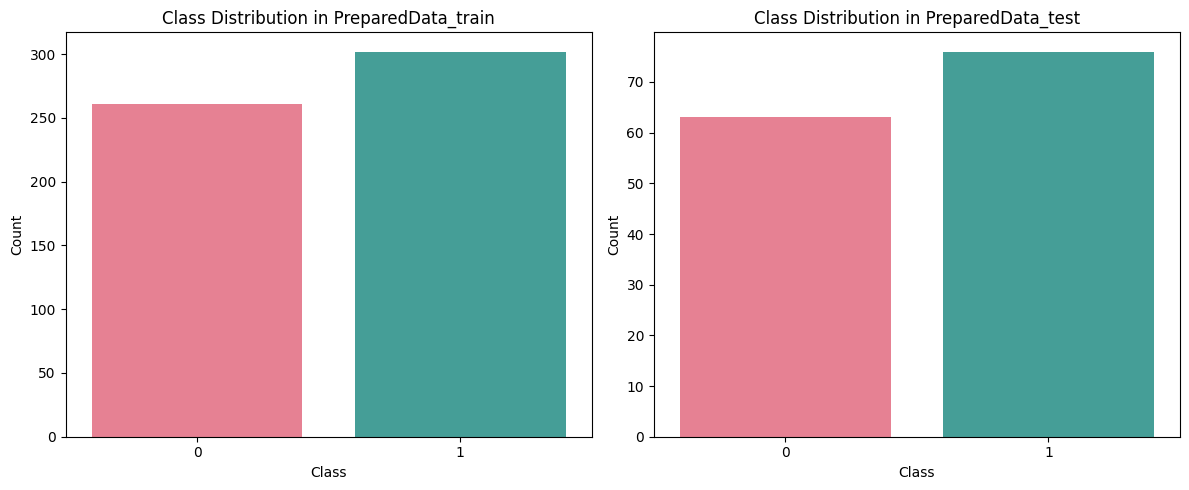

In [12]:
def visualize_class_distribution(dataframe1, dataframe2):
    """
    Visualize the class distribution of two dataframes using barplots.
    This function takes two dataframes and creates side-by-side barplots to visualize the class distribution of each dataframe.
    Parameters:
    - Dataframe1, dataframe 2: The first, second dataframe for class distribution visualization.
    Returns:
    - Displays the barplots for visualization).
    """

    # Count the number of samples in each class for the first dataframe
    class_counts1 = dataframe1['labels'].value_counts()

    # Count the number of samples in each class for the second dataframe
    class_counts2 = dataframe2['labels'].value_counts()

    # Define a color palette with different colors for each class
    palette = sns.color_palette("husl", len(class_counts1))

    # Create subplots to visualize class distribution
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot for the first dataframe
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=FutureWarning)  # Ignore the FutureWarning
        sns.barplot(x=class_counts1.index, y=class_counts1, palette=palette, ax=axes[0], legend=False)
    axes[0].set_title("Class Distribution in PreparedData_train")
    axes[0].set_xlabel("Class")
    axes[0].set_ylabel("Count")

    # Plot for the second dataframe
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=FutureWarning) 
        sns.barplot(x=class_counts2.index, y=class_counts2, palette=palette, ax=axes[1], legend=False)
    axes[1].set_title("Class Distribution in PreparedData_test")
    axes[1].set_xlabel("Class")
    axes[1].set_ylabel("Count")

    plt.tight_layout()
    plt.show()

#Call_func:
visualize_class_distribution(PreparedData_train, PreparedData_test)


### 3. Kernel Density Plots to visualize values in data.


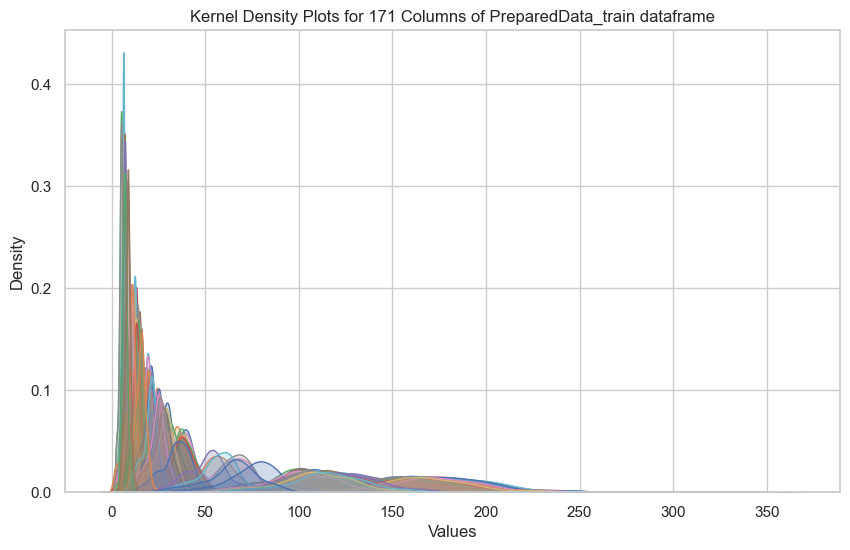

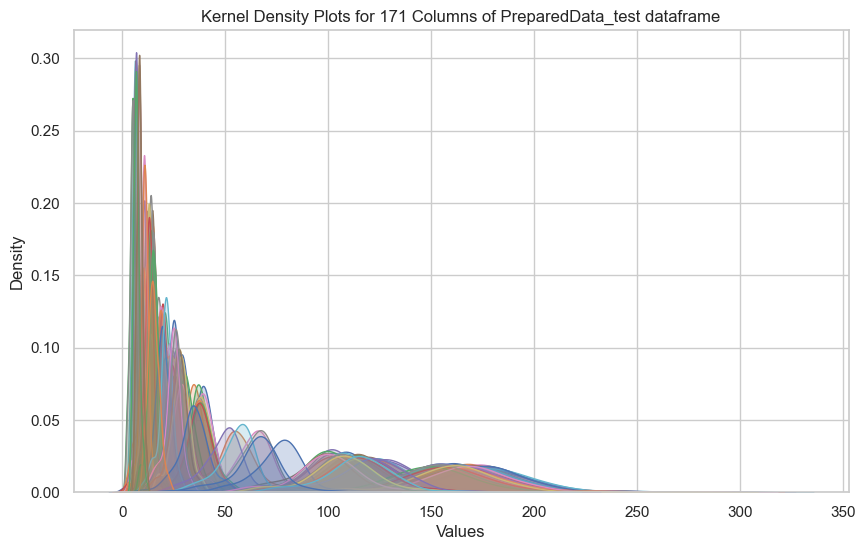

In [13]:
def visualize_kde_plots(dataframe, dataframe_name):
    """
    This function creates Kernel Density Plots for the columns in a DataFrame, excluding the 'labels' column.
    Parameters:
    - Dataframe: The DataFrame containing the data to be visualized.
    - Dataframe_name: The name of the DataFrame for use in the title.
    Returns:
    - Displays the Kernel Density Plots.
    """

    # Create a subset of the DataFrame by excluding the 'labels' column
    subset = dataframe.drop(columns=['labels'], errors='ignore')

    # Set the seaborn style to "whitegrid" for the plots
    sns.set(style="whitegrid")

    # Create a matplotlib figure with a specific size
    plt.figure(figsize=(10, 6))

    # Iterate through the selected columns
    for column in subset.columns:
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore")  # Ignore all warnings
            sns.kdeplot(subset[column], label=column, shade=True)

    # Set the title based on the dataframe name and labels for the plot
    plt.title(f"Kernel Density Plots for 171 Columns of {dataframe_name} dataframe")
    plt.xlabel("Values")
    plt.ylabel("Density")

    # Display the Kernel Density Plots
    plt.show()

#Call_func:
visualize_kde_plots(PreparedData_train, "PreparedData_train")
visualize_kde_plots(PreparedData_test, "PreparedData_test")


### 4. PCA.


4.1 *PCA_function.*

In [14]:
def perform_pca(input_df, n_components=3):
    """
    Perform Principal Component Analysis (PCA) on an input DataFrame to reduce dimensionality.
    Parameters:
    - Input_df: The input DataFrame containing the data to be processed.
    - N_components: The number of principal components to retain (default is 3).
    Returns:
    - pca_df: A new DataFrame containing the PCA components.
    """

    # Create a PCA model with the specified number of components
    pca = PCA(n_components=n_components)

    # Fit the PCA model to the input DataFrame and transform the data
    pca_result = pca.fit_transform(input_df)

    # Create a new DataFrame with the PCA components and column names
    pca_df = pd.DataFrame(data=pca_result, columns=[f'f{i+1}' for i in range(n_components)])

    return pca_df


4.2 *Create new dataframe use PCA.*

In [15]:
# Perform PCA on the training data
pca_PreparedData_train = perform_pca(PreparedData_train.drop(columns=['labels']), n_components=3)

# Combine PCA components with the 'labels' column for the training data
pca_PreparedData_train = pd.concat([pca_PreparedData_train, PreparedData_train['labels']], axis=1)

print("PCA for PreparedData_train:")
print(pca_PreparedData_train)

# Perform PCA on the test data
pca_PreparedData_test = perform_pca(PreparedData_test.drop(columns=['labels']), n_components=3)

# Combine PCA components with the 'labels' column for the test data
pca_PreparedData_test = pd.concat([pca_PreparedData_test, PreparedData_test['labels']], axis=1)

print("PCA for PreparedData_test:")
print(pca_PreparedData_test)


PCA for PreparedData_train:
             f1         f2         f3  labels
0    162.872354  -2.822914   0.332575       0
1    157.620674  -7.527139   1.053702       0
2      6.227720 -10.327573  -7.772706       0
3   -109.727426  15.461570 -26.661955       0
4   -145.125498  13.599296 -24.742417       0
..          ...        ...        ...     ...
558  275.595403 -20.385580  10.165088       1
559  273.969815 -24.465244   9.714910       1
560  276.615116 -24.299929   9.305126       1
561  275.960712 -22.807903   9.552628       1
562  282.871685 -25.102311  11.252754       1

[563 rows x 4 columns]
PCA for PreparedData_test:
             f1         f2         f3  labels
0     23.813775  -2.320383   0.379103       0
1   -159.808900 -27.613318 -28.931447       0
2   -167.772735 -28.169492 -28.616900       0
3   -134.859405 -22.502568 -26.043269       0
4    -76.566497 -28.385970 -42.124868       0
..          ...        ...        ...     ...
134  -42.326133  37.257286  14.976192       1
1

4.3 *Visualize histogram for label in pca_dataframe.*

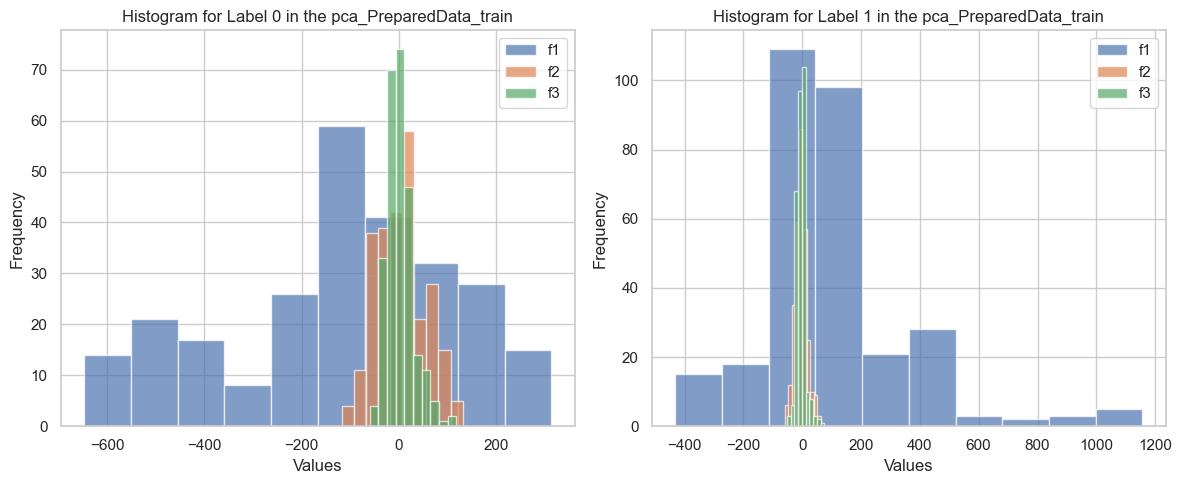

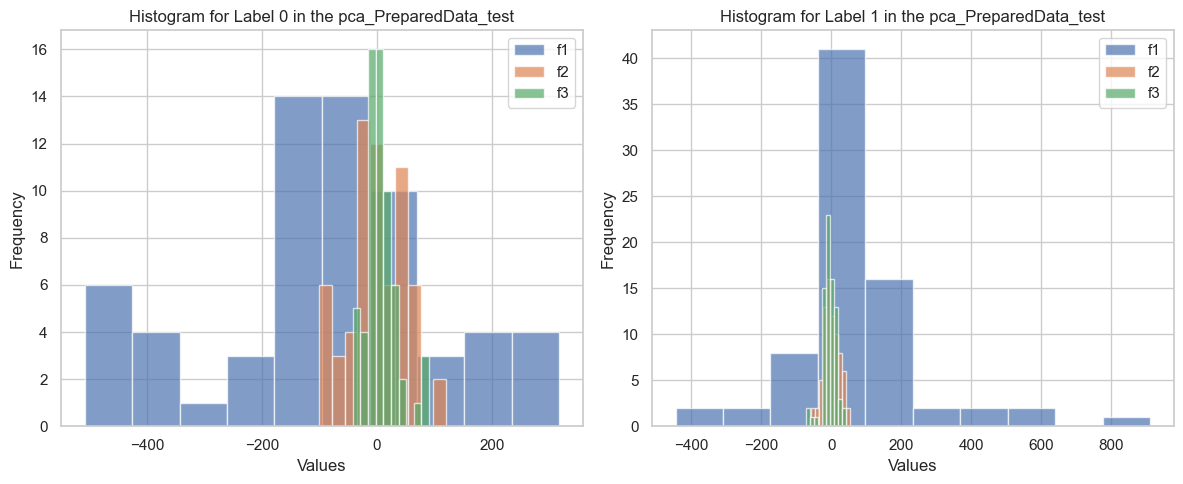

In [16]:

def visualize_label_histograms(dataframe, dataframe_name):
    """
    Visualize histograms for two labels (0 and 1) in a given DataFrame.
    This function creates subplots with histograms for each column in the DataFrame, separated by label values 0 and 1.
    Parameters:
    - dataframe: The DataFrame containing the data to visualize.
    - dataframe_name: The name of the DataFrame for use in titles.
    Returns:
    - Displays the histograms.
    """

    # Create subplots for label 0 and label 1 histograms
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    for label_value in [0, 1]:
        ax = axes[label_value]

        for column in dataframe.columns:
            if column != 'labels':
                data_to_plot = dataframe[dataframe['labels'] == label_value][column]
                ax.hist(data_to_plot, bins=10, alpha=0.7, label=column)

        # Set title for the subplot
        ax.set_title(f"Histogram for Label {label_value} in the {dataframe_name}")

        # Set labels for the x and y axes
        ax.set_xlabel("Values")
        ax.set_ylabel("Frequency")

        # Display legend for different columns
        ax.legend()

    # Adjust the layout for subplots
    plt.tight_layout()
    plt.show()
#Call_func:
dataframe_name = "pca_PreparedData_train"  # Replace with the actual name of your DataFrame
visualize_label_histograms(pca_PreparedData_train, dataframe_name)
dataframe_name = "pca_PreparedData_test"  # Replace with the actual name of your DataFrame
visualize_label_histograms(pca_PreparedData_test, dataframe_name)



4.4 *Normalize PCA Data.*

In [17]:

# Create a StandardScaler instance
scaler = StandardScaler()

# Select the columns for standardization (z-score scaling)
columns_to_standardize = [col for col in pca_PreparedData_train.columns if col != 'labels']

# Fit and transform the selected columns in both DataFrames
pca_PreparedData_train[columns_to_standardize] = scaler.fit_transform(pca_PreparedData_train[columns_to_standardize])
pca_PreparedData_test[columns_to_standardize] = scaler.transform(pca_PreparedData_test[columns_to_standardize])

# pca_CombinedData_train
pca_PreparedData_test

,f1,f2,f3,labels
0,0.088331,-0.061749,0.017789,0
1,-0.592770,-0.734836,-1.357595,0
2,-0.622310,-0.749637,-1.342835,0
3,-0.500226,-0.598831,-1.222069,0
4,-0.284004,-0.755398,-1.976690,0
...,...,...,...,...
134,-0.156998,0.991478,0.702751,1
135,-0.237690,1.340523,1.709954,1
136,0.442525,-0.297719,-1.206572,1
137,0.338090,0.800255,1.252003,1


4.5 *Visualize PCA data after normalize.*

In [24]:
def visualize_3d_scatter(data, x_column, y_column, z_column, color_column, dataframe_name):
    """
    Create and display a 3D scatter plot using Plotly.

    Parameters:
        data (pandas.DataFrame): The data to plot.
        x_column: The column name for the x-axis.
        y_column: The column name for the y-axis.
        z_column: The column name for the z-axis.
        color_column: The column name for coloring data points.
        dataframe_name (str): The name of the DataFrame for the title.
    Returns:
        None
    """
    # Create a 3D scatter plot
    fig = px.scatter_3d(data, x=x_column, y=y_column, z=z_column, color=color_column)

    # Set the title based on the DataFrame name
    title = f"Visualize {dataframe_name} after normalize."
    fig.update_layout(title=title)

    # Show the plot
    fig.show()

# Call the function with your specific DataFrames, columns, and DataFrame name
visualize_3d_scatter(pca_PreparedData_train, 'f1', 'f2', 'f3', 'labels', 'pca_PreparedData_train')



### 5. Visualize on Image.

5.1 *Visualize selected keypoints on image.*

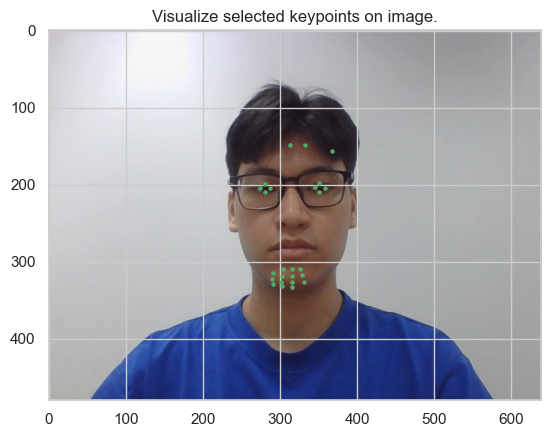

In [19]:
# Initialize MediaPipe Face Detection and Facial Landmarks models
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(refine_landmarks=True)

# Define the indices of the desired keypoints (0 to 467)
right_iris = [469, 470, 471, 472]
left_iris = [474, 475, 476, 477]
cheeks = [10, 32, 140, 148, 152, 171, 175, 176, 199, 200, 201, 208, 332, 338, 396, 421, 428] 

desired_keypoint_indices = []
desired_keypoint_indices.append(cheeks)
desired_keypoint_indices.append(right_iris)
desired_keypoint_indices.append(left_iris)

image = cv2.imread('image_10.jpg')
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

landmarks = face_mesh.process(rgb_image)

# Get the image size
ih, iw, _ = image.shape

if landmarks.multi_face_landmarks:
    for face_landmarks in landmarks.multi_face_landmarks:
        # Create a new figure and plot landmarks in a plot coordinate system
        plt.figure()
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Visualize selected keypoints on image.")

        # Draw circles only at the desired keypoints
        keypoints = [(int(landmark.x * iw), int(landmark.y * ih)) for landmark in face_landmarks.landmark]

        for indices in desired_keypoint_indices:
            keypoints_to_draw = [keypoints[index] for index in indices if index < len(keypoints)]

            for cx, cy in keypoints_to_draw:
                plt.scatter(cx, cy, s=5, c='g', marker='o')

        plt.show()

# Close the OpenCV window
cv2.destroyAllWindows()


5.2 *Visual distances between selected keypoints on Images.*

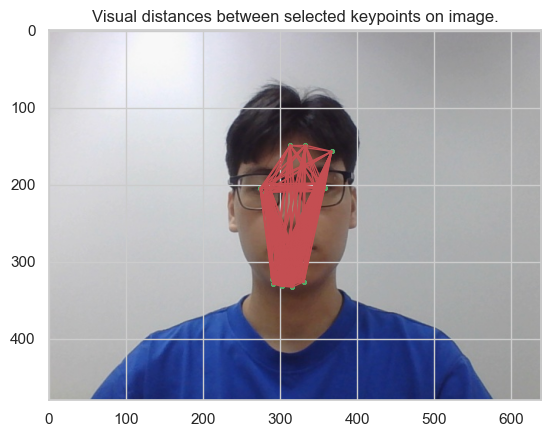

In [20]:
# Initialize MediaPipe Face Detection and Facial Landmarks models
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(refine_landmarks=True)

# Define the indices of the desired keypoints (0 to 467)
right_iris = [469, 470, 471, 472]
left_iris = [474, 475, 476, 477]
cheeks = [10, 32, 140, 148, 152, 171, 175, 176, 199, 200, 201, 208, 332, 338, 396, 421, 428] 

desired_keypoint_indices = []
desired_keypoint_indices.extend(cheeks)
desired_keypoint_indices.extend(right_iris)
desired_keypoint_indices.extend(left_iris)

image = cv2.imread('image_10.jpg')  # Make sure to use the correct image path
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

landmarks = face_mesh.process(rgb_image)

# Get the image size
ih, iw, _ = image.shape

if landmarks.multi_face_landmarks:
    for face_landmarks in landmarks.multi_face_landmarks:
        # Create a new figure and plot landmarks in a plot coordinate system
        plt.figure()
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Visual distances between selected keypoints on image.")

        # Draw circles at the desired keypoints and lines between them
        keypoints = [(int(landmark.x * iw), int(landmark.y * ih)) for landmark in face_landmarks.landmark]

        for i in range(len(desired_keypoint_indices)):
            for j in range(i + 1, len(desired_keypoint_indices)):
                index1 = desired_keypoint_indices[i]
                index2 = desired_keypoint_indices[j]
                if index1 < len(keypoints) and index2 < len(keypoints):
                    pt1 = keypoints[index1]
                    pt2 = keypoints[index2]
                    plt.scatter(pt1[0], pt1[1], s=5, c='g', marker='o')
                    plt.scatter(pt2[0], pt2[1], s=5, c='g', marker='o')
                    plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], color='r', linewidth=1)

        plt.show()

# Close the OpenCV window
cv2.destroyAllWindows()

5.3 *Visualize selected keypoints in 3D.*

In [21]:
def visualize_face_landmarks_3d(image_path):
    """
    Visualizes 3D facial landmarks from an image using MediaPipe Face Mesh for selected keypoints.

    Parameters:
    - image_path: The path to the image for which you want to visualize facial landmarks.

    Returns:
    - Displays a 3D scatter plot of selected facial landmarks.
    """

    # Initialize MediaPipe Face Detection and Facial Landmarks models
    mp_face_mesh = mp.solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh(refine_landmarks=True)

    # Define the indices of the desired keypoints (0 to 467)
    right_iris = [469, 470, 471, 472]
    left_iris = [474, 475, 476, 477]
    cheeks = [10, 32, 140, 148, 152, 171, 175, 176, 199, 200, 201, 208, 332, 338, 396, 421, 428]

    desired_keypoint_indices = []
    desired_keypoint_indices.append(cheeks)
    desired_keypoint_indices.append(right_iris)
    desired_keypoint_indices.append(left_iris)
    
    image = cv2.imread(image_path)

    # Process landmarks
    landmarks = face_mesh.process(image)

    if landmarks.multi_face_landmarks:
        # Create empty lists to store the 3D coordinates
        x, y, z = [], [], []

        for face_landmarks in landmarks.multi_face_landmarks:
            for indices in desired_keypoint_indices:
                for index in indices:
                    landmark = face_landmarks.landmark[index]
                    x.append(landmark.x)
                    y.append(landmark.y)
                    z.append(landmark.z)

        # Create a DataFrame from the coordinates
        df = pd.DataFrame({'X': x, 'Y': y, 'Z': z})

        # Create a 3D scatter plot using Plotly Express with smaller keypoint markers
        fig = px.scatter_3d(df, x='X', y='Y', z='Z', labels={'X': 'X', 'Y': 'Y', 'Z': 'Z'},
                            color_discrete_sequence=['blue'], opacity=0.7, size_max=1.5)
        fig.update_traces(marker=dict(size=3))  # Adjust the marker size here
        fig.update_layout(title='Visualize selected keypoints in 3D.')
        fig.show()

# Call_func:
image_path = r'image_10.jpg'  # Replace with the path to your image
visualize_face_landmarks_3d(image_path)


5.4 *Visualize all keypoints on 3D.*

In [22]:
def visualize_3d_landmarks(image_path):
    """
    Visualizes 3D facial landmarks from an image using MediaPipe Face Mesh.

    Parameters:
    - image_path: The path to the image for which you want to visualize facial landmarks.

    Returns:
    - Displays a 3D scatter plot of facial landmarks.
    """

    # Initialize MediaPipe Face Detection and Facial Landmarks models
    mp_face_mesh = mp.solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh()

    # Load the image
    image = cv2.imread(image_path)

    # Process landmarks
    landmarks = face_mesh.process(image)

    if landmarks.multi_face_landmarks:
        # Create empty lists to store the 3D coordinates
        x = []
        y = []
        z = []

        for face_landmarks in landmarks.multi_face_landmarks:
            for landmark in face_landmarks.landmark:
                x.append(landmark.x)
                y.append(landmark.y)
                z.append(landmark.z)

        # Create a DataFrame from the coordinates
        df = pd.DataFrame({'X': x, 'Y': y, 'Z': z})

        # Create a 3D scatter plot using Plotly Express with a smaller marker size
        fig = px.scatter_3d(df, x='X', y='Y', z='Z', color=df.index, labels={'X': 'X', 'Y': 'Y', 'Z': 'Z'})
        fig.update_traces(marker=dict(size=2))  # Adjust the size_max to your preference
        fig.update_layout(title='Visualize all keypoints on 3D.')
        fig.show()

# Call_func:
image_path = r'image_10.jpg'  # Replace with the path to your image
visualize_3d_landmarks(image_path)
